In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread



In [31]:
def find_edges(data):
    clip = []
    t = data.shape
    nrows = t[0]
    ncols = t[1]
    test_rows = 255*np.ones(data[0,:,0].shape)
    test_cols = 255*np.ones(data[:,0,0].shape)
    # start from top and scan each row for whitepixels
    for i in range(0,int(nrows/2),1): 
        c1 = np.array_equal(test_rows,data[i,:,0])
        c2 = np.array_equal(test_rows,data[i,:,0])
        c3 = np.array_equal(test_rows,data[i,:,0])
        if c1 == False and c2 == False and c3 == False:
            clip.append(i)
            
            break
    # start from bottom and scan each row for whitepixels
    for i in range(nrows-1,int(nrows/2),-1):
        c1 = np.array_equal(test_rows,data[i,:,0])
        c2 = np.array_equal(test_rows,data[i,:,0])
        c3 = np.array_equal(test_rows,data[i,:,0])
        if c1 == False and c2 == False and c3 == False:
            clip.append(i)
        
            break
    # start from left and scan each column for white pixels
    for i in range(0,int(ncols/2),1):
        c1 = np.array_equal(test_cols,data[:,i,0])
        c2 = np.array_equal(test_cols,data[:,i,0])
        c3 = np.array_equal(test_cols,data[:,i,0])
        
        if c1 == False and c2 == False and c3 == False:
            clip.append(i)
            break 
    # start from right and scan each column for white pixels
    for i in range(ncols-1,int(ncols/2),-1):
        c1 = np.array_equal(test_cols,data[:,i,0])
        c2 = np.array_equal(test_cols,data[:,i,0])
        c3 = np.array_equal(test_cols,data[:,i,0])
        
        if c1 == False and c2 == False and c3 == False:
            clip.append(i)
            break 
    return clip 
    #clip is a list with four values and constitutes the rectangle which contains the cropped image


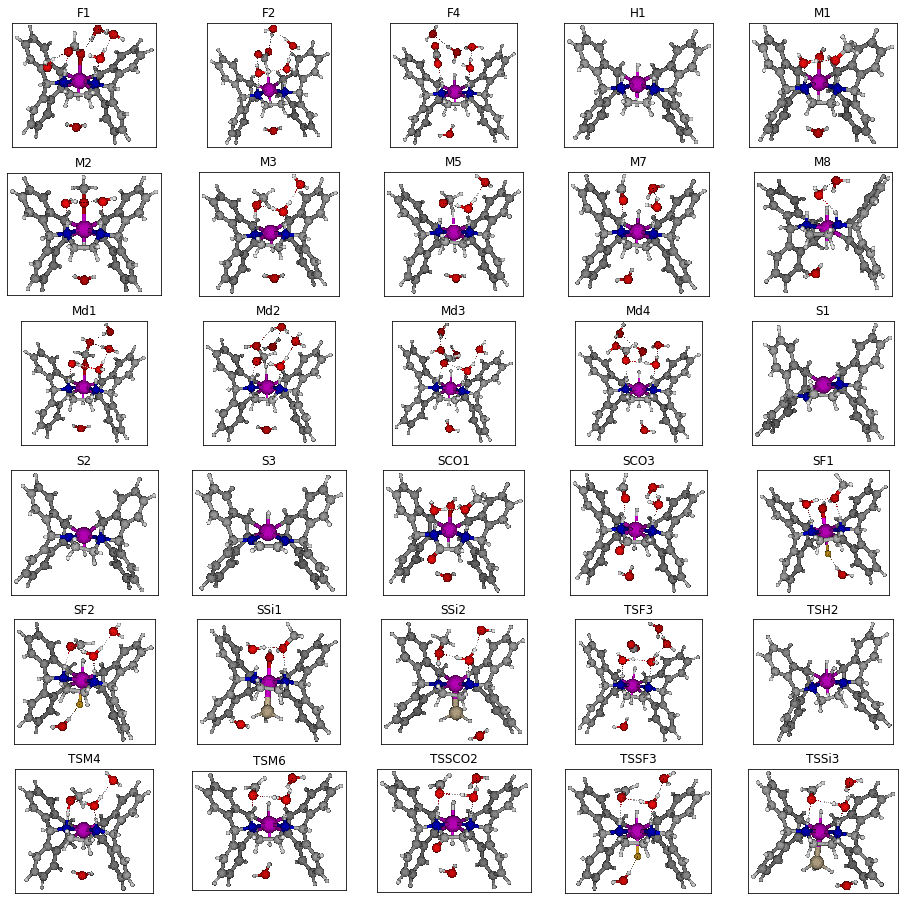

In [33]:
# set how many rows and columns you need in the final picture
nrows = 6
ncols = 5
f, ax = plt.subplots(nrows, ncols, figsize = [16,16])
text_file = open('files.xyz','r')  #files.xyz contains the name of all the image files, see the sample files.xyz uploaded with this code
list1 = text_file.readlines()
text_file.close()
L = len(list1) 
c = 0
for row in range(nrows):
    
    for col in range(ncols):
        if c < L:
            img = list1[c].split()[0]

            data = plt.imread(str(list1[c].split()[0]))
            clip = find_edges(data)
            # added a padding of 10 units for some whitespace on the edges
            clip[0] = clip[0] - 10
            clip[1] = clip[1] + 10
            clip[2] = clip[2] - 10
            clip[3] = clip[3] + 10
            ax[row,col].imshow(data[clip[0]:clip[1],clip[2]:clip[3],:])
            ax[row,col].title.set_text(list1[c].split('.')[0])
            #ax[row, col].axis('off')   #uncomment this to remove the outer frame from each picture
            ax[row, col].get_xaxis().set_visible(False)
            ax[row, col].get_yaxis().set_visible(False)
        if c >= L:
            
            ax[row, col].axis('off')
            
            ax[row, col].get_xaxis().set_visible(False)
            ax[row, col].get_yaxis().set_visible(False)
        c = c + 1
        
plt.savefig('test.png',dpi = 600)
